In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
# import re
from nltk.tokenize import word_tokenize

In [10]:
# investigation of interrigation words
# https://sv.wikipedia.org/wiki/Fr%C3%A5geord

q_words = ['vad', 'hur', 'när', 'var', 'varifrån', 'varför', 'vart', 'vilken', 'vilket', 'vilka', 'vem', 'vems'] 
upos_tags = {'NOUN': 0, 'VERB':0, 'NUM':0, 'ADJ':0, 'ADV':0, 'PROPN':0, 'PRON':0, 'DET':0}

In [11]:
# load the data
df_train = pd.read_pickle("../data_frames/parsed_answer_data/df_train_cleaned.pkl")
df_dp_train = pd.read_pickle("../data_frames/dependency_parsed_data/df_train_cleaned.pkl")
df_dp_train.head()

,index,answer,answer_lemmas,answer_stop_lemmas,answer_words,answer_stop_words,answer_pos,answer_deprel,answer_root,answer_root_pos,...,word_stop_ans_wordcount,word_stop_q_wordcount,lemma_overlap_count,lemma_overlap_words,lemma_ans_wordcount,lemma_q_wordcount,lemma_stop_overlap_count,lemma_stop_overlap_words,lemma_stop_ans_wordcount,lemma_stop_q_wordcount
0,0,ett tillstånd för att resa in och vara i ett land,"[en, tillstånd, för, att, resa, in, och, vara,...","[tillstånd, resa, in, land]","[ett, tillstånd, för, att, resa, in, och, vara...","[tillstånd, resa, in, land]","[DET, NOUN, ADP, PART, VERB, ADV, CCONJ, AUX, ...","[det, root, mark, mark, advcl, compound:prt, c...",tillstånd,NOUN,...,7,1,3,"[visum, vara, en]",14,4,1,[visum],7,1
1,1,ditt pass,"[du, pass]",[pass],"[ditt, pass]",[pass],"[PRON, NOUN]","[nmod:poss, root]",pass,NOUN,...,5,4,7,"[när, du, skola, hämta, beslut, ta, med]",8,8,4,"[skola, hämta, beslut, ta]",5,4
2,2,ett år,"[en, år]",[år],"[ett, år]",[år],"[DET, NOUN]","[det, root]",år,NOUN,...,11,5,7,"[länge, gälla, en, uppehållstillstånd, för, be...",17,8,4,"[länge, gälla, uppehållstillstånd, besök]",10,4
3,3,ett bevis,"[en, bevis]",[bevis],"[ett, bevis]",[bevis],"[DET, NOUN]","[det, root]",bevis,NOUN,...,9,1,2,"[vara, en]",17,4,0,[],9,1
4,4,ett bevis,"[en, bevis]",[bevis],"[ett, bevis]",[bevis],"[DET, NOUN]","[det, root]",bevis,NOUN,...,9,1,2,"[vara, en]",17,4,0,[],9,1


In [12]:
def map_interrogative_words(df, all_q_words):
    interrogative_words = []
    for index, row in df.iterrows():
        interrogative_words_in_q = []
        # q_words = row['q_words'] # lemmatized words in the question
        q_words = word_tokenize(row['question'])
        # find the question word that is used in the question
        for q_w in all_q_words:
            if q_w in q_words:
                interrogative_words_in_q.append(q_w)
        
        if len(interrogative_words_in_q) < 1:
            # fix for weird words in the dataset..
            if 'vemvilka' in q_words:
                interrogative_words_in_q.append('vem')
            elif 'viket' in q_words:
                interrogative_words_in_q.append('vilket')

        interrogative_words.append(interrogative_words_in_q)

    return interrogative_words

df_dp_train['interrogative_words'] = map_interrogative_words(df_dp_train, q_words)
df_dp_train.head()
        

,index,answer,answer_lemmas,answer_stop_lemmas,answer_words,answer_stop_words,answer_pos,answer_deprel,answer_root,answer_root_pos,...,word_stop_q_wordcount,lemma_overlap_count,lemma_overlap_words,lemma_ans_wordcount,lemma_q_wordcount,lemma_stop_overlap_count,lemma_stop_overlap_words,lemma_stop_ans_wordcount,lemma_stop_q_wordcount,interrogative_words
0,0,ett tillstånd för att resa in och vara i ett land,"[en, tillstånd, för, att, resa, in, och, vara,...","[tillstånd, resa, in, land]","[ett, tillstånd, för, att, resa, in, och, vara...","[tillstånd, resa, in, land]","[DET, NOUN, ADP, PART, VERB, ADV, CCONJ, AUX, ...","[det, root, mark, mark, advcl, compound:prt, c...",tillstånd,NOUN,...,1,3,"[visum, vara, en]",14,4,1,[visum],7,1,[vad]
1,1,ditt pass,"[du, pass]",[pass],"[ditt, pass]",[pass],"[PRON, NOUN]","[nmod:poss, root]",pass,NOUN,...,4,7,"[när, du, skola, hämta, beslut, ta, med]",8,8,4,"[skola, hämta, beslut, ta]",5,4,"[vad, när]"
2,2,ett år,"[en, år]",[år],"[ett, år]",[år],"[DET, NOUN]","[det, root]",år,NOUN,...,5,7,"[länge, gälla, en, uppehållstillstånd, för, be...",17,8,4,"[länge, gälla, uppehållstillstånd, besök]",10,4,[hur]
3,3,ett bevis,"[en, bevis]",[bevis],"[ett, bevis]",[bevis],"[DET, NOUN]","[det, root]",bevis,NOUN,...,1,2,"[vara, en]",17,4,0,[],9,1,[vad]
4,4,ett bevis,"[en, bevis]",[bevis],"[ett, bevis]",[bevis],"[DET, NOUN]","[det, root]",bevis,NOUN,...,1,2,"[vara, en]",17,4,0,[],9,1,[vad]


In [52]:
def print_interrogative_word_statistics(key, value, word_stats):
    # value is a map where the word type is the key and count is an obj with 'count' as a key
    for pos in value.keys():
        stats = word_stats[pos]
        print('-------------------')
        print('pos tag: ', pos)
        print('root words, selection: ', stats['roots'][:10])
    plt.bar(value.keys(), value.values(), color='teal')
    plt.title('UPOS tag of answer root for \"'+ key + '\"')
    plt.ylabel('Number of Q/A pairs')
    plt.savefig("POS_tag_{}".format(key))
    plt.show()


def print_interrogative_word_appearance(word_stats_dict):
    plt.figure(figsize=(8,5))
    plt.bar(word_stats_dict.keys(), word_stats_dict.values(), color='teal')
    plt.title('Interrogative words in dataset')
    plt.ylabel('Number of Q/A pairs')
    plt.show()



In [53]:
def get_interrogative_word_statistics(df, type):
    interrogative_word_stats = {}
    interrogative_word_ans_root_map = {}
    interrogative_word_ans_root_map_count = {}
    for index, row in df.iterrows():
        answer_root_pos = row[type+'_root_pos'] # type can be answer / sent
        answer_root = row[type+'_root']
        question_words = row['interrogative_words']
        for q_w in question_words:
            if q_w in interrogative_word_ans_root_map:
                # count the appearance of the question word
                interrogative_word_stats[q_w] += 1
                if answer_root_pos in interrogative_word_ans_root_map[q_w]:
                    # data structure not saving the actual words
                    interrogative_word_ans_root_map_count[q_w][answer_root_pos] += 1
                    # data structure saving the root words
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['count'] += 1
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['roots'].append(answer_root)
                else:
                    interrogative_word_ans_root_map_count[q_w][answer_root_pos] = 1

                    interrogative_word_ans_root_map[q_w][answer_root_pos] = {}
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['count'] = 1
                    interrogative_word_ans_root_map[q_w][answer_root_pos]['roots'] = [answer_root]
            else:
                # Add to the stats of the question word
                interrogative_word_stats[q_w] = 1
                # add to the map quetion_pos -> root
                interrogative_word_ans_root_map_count[q_w] = copy.deepcopy(upos_tags)
                interrogative_word_ans_root_map_count[q_w][answer_root_pos] += 1
                interrogative_word_ans_root_map[q_w] = {answer_root_pos: { 'count': 1, 'roots': [answer_root]}}
    
    # remove the keys which have no occurrences of the word type
    for q_w in q_words:
        i_word_stats = interrogative_word_ans_root_map_count[q_w]
        i_word_stats_mod = copy.deepcopy(i_word_stats)
        for key, val in i_word_stats.items():
            if val == 0:
                del i_word_stats_mod[key]
        interrogative_word_ans_root_map_count[q_w] = i_word_stats_mod

    return interrogative_word_ans_root_map, interrogative_word_ans_root_map_count, interrogative_word_stats



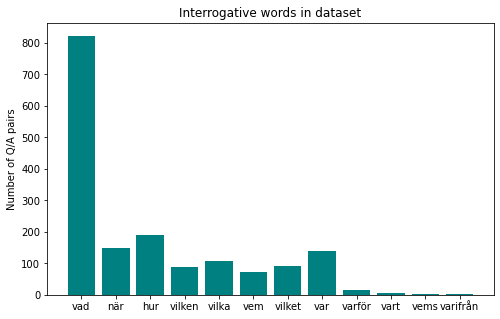

-------------------
pos tag:  NOUN
root words, selection:  ['tillstånd', 'pass', 'bevis', 'bevis', 'bevis', 'fingeravtryck', 'fingeravtryck', 'elinstallatör', 'föräldramöte', 'personuppgift']
-------------------
pos tag:  VERB
root words, selection:  ['återvända', 'få', 'bli', 'kontakta', 'ställa', 'arbeta', 'ansöka', 'utsätta', 'kontakta', 'boka']
-------------------
pos tag:  NUM
root words, selection:  ['118031', '2030', '2']
-------------------
pos tag:  ADJ
root words, selection:  ['ifylld', 'uppfylld', 'ifylld', 'uppmärksam', 'antagen', 'datorstyrd', 'utlägd', 'låg', 'planera', 'giltig']
-------------------
pos tag:  ADV
root words, selection:  ['intensiv', 'dagtid']
-------------------
pos tag:  PROPN
root words, selection:  ['viking', 'sz', 'scs', 'förster', 'rose', 'anders', 'håkan', 'torsten', 'carl', 'eero']
-------------------
pos tag:  PRON
root words, selection:  ['de', 'den', 'ingen', 'ingen', 'man']


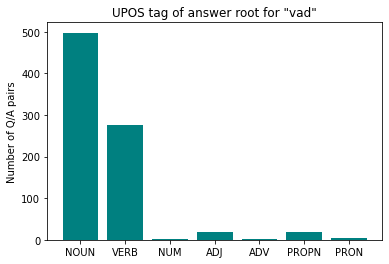

-------------------
pos tag:  NOUN
root words, selection:  ['pass', 'september', 'år', 'september', 'programmering', 'immunförsvar', 'flykting', 'slut', 'sensommare', 'pass']
-------------------
pos tag:  VERB
root words, selection:  ['lämna', 'boka', 'ha', 'bli', 'komma', 'uppge', 'bo', 'hämta', 'förändra', 'ta']
-------------------
pos tag:  NUM
root words, selection:  ['2008', '2016', '2008', '2013', '2012', '2009', '2006', '1552', '1977', '1994']
-------------------
pos tag:  ADJ
root words, selection:  ['begånge', 'ovanlig']
-------------------
pos tag:  ADV
root words, selection:  ['dagtid']


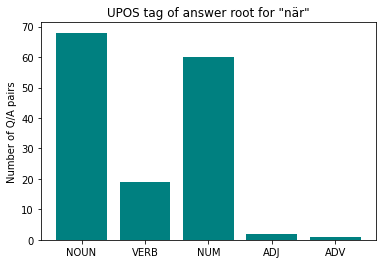

-------------------
pos tag:  NOUN
root words, selection:  ['år', 'år', 'dag', 'timme', 'vecka', 'månad', 'år', 'beskrivning', 'beskrivning', 'viseringskalkylator']
-------------------
pos tag:  VERB
root words, selection:  ['meddela', 'följa', 'beteckna', 'påbörja', 'producera', 'bli', 'klara']
-------------------
pos tag:  NUM
root words, selection:  ['16', '450', '30', '30', '14', '3', '13', 'fem', '20', '15']
-------------------
pos tag:  ADJ
root words, selection:  ['ensam', 'ren', 'frihetsberövande', 'låg', 'lång', 'lång', 'positiv', 'knyta', 'problemfri', 'lång']
-------------------
pos tag:  ADV
root words, selection:  ['tills', 'vart', 'ute', 'fram']
-------------------
pos tag:  PRON
root words, selection:  ['en', 'man', 'ingen']
-------------------
pos tag:  DET
root words, selection:  ['var']


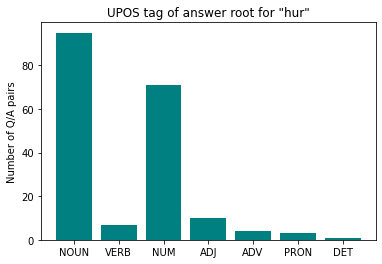

-------------------
pos tag:  NOUN
root words, selection:  ['arbetsplats', 'vecka', 'merit', 'vecka', 'år', 'fysiologi', 'affärsjuridik', 'juli', 'oktober', 'skadereglering']
-------------------
pos tag:  VERB
root words, selection:  ['utom', 'tappa', 'kombinera']
-------------------
pos tag:  NUM
root words, selection:  ['7', '18', '2009', '1638', '1977-83']
-------------------
pos tag:  ADJ
root words, selection:  ['europeisk', 'prostituerad', 'nederländsk', 'giltig']
-------------------
pos tag:  PROPN
root words, selection:  ['linköping', 'friedrich', 'v', 'stockholm', 'london', 'bombay', 'örebro']


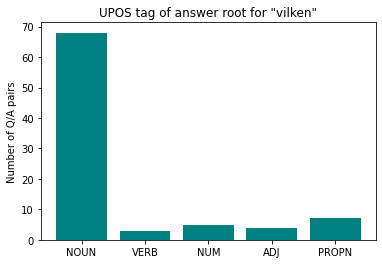

-------------------
pos tag:  NOUN
root words, selection:  ['arbetsgivare', 'organisation', 'tjänste-man', 'skola', 'medborgare', 'skolbibliotek', 'specialpedagog', 'flygteknik', 'fruktträd', 'person']
-------------------
pos tag:  VERB
root words, selection:  ['se', 'innesa']
-------------------
pos tag:  NUM
root words, selection:  ['1956']
-------------------
pos tag:  ADJ
root words, selection:  ['europeisk', 'ung', 'nödvändig', 'gul', 'inkommande']
-------------------
pos tag:  PROPN
root words, selection:  ['sverige', 'sverige', 'storbritannien', 'nordamerika', 'm', 'usa', 'sven-hugo', 'karl', 'norden', 'usa']
-------------------
pos tag:  PRON
root words, selection:  ['de']
-------------------
pos tag:  DET
root words, selection:  ['en']


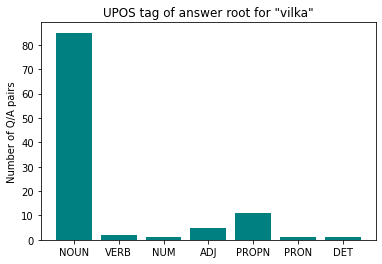

-------------------
pos tag:  NOUN
root words, selection:  ['huvudman', 'organisation', 'säljare', 'flygtekniker', 'arbetsgivare', 'beställare', 'befälhavare', 'rekryterare', 'ambulanssjukvårdare', 'ortopedingenjör']
-------------------
pos tag:  VERB
root words, selection:  ['vanida']
-------------------
pos tag:  ADJ
root words, selection:  ['minderårig']
-------------------
pos tag:  PROPN
root words, selection:  ['frank', 'gunnar', 'carol', 'john', 'claes', 'poul', 'gregor', 'ragnar', 'håkan', 'göran']
-------------------
pos tag:  PRON
root words, selection:  ['den', 'vem', 'vem', 'den']


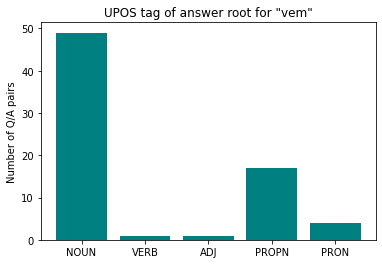

-------------------
pos tag:  NOUN
root words, selection:  ['oktober', 'bemanningsföretag', 'juni', 'hjär', 'turistchef', 'tita', 'mångfald', 'skogvaktare', 'lantbruksuniversitet', 'kolportörsyrk']
-------------------
pos tag:  VERB
root words, selection:  ['upptäcka', 'delta', 'godta', 'godta', 'planera', 'förändra', 'förrätta', 'ha', 'efterfråga', 'inneha']
-------------------
pos tag:  NUM
root words, selection:  ['248011', '5223-7005', '242011', '118031', '164011', '124011', '186011', '118031', '190011', '2016']
-------------------
pos tag:  PROPN
root words, selection:  ['vietnam', 'danmark', 'tyskland', 'sverige', 'sverige', 'erik', 'sverige', 'danmark', 'lucky', 'danmark']


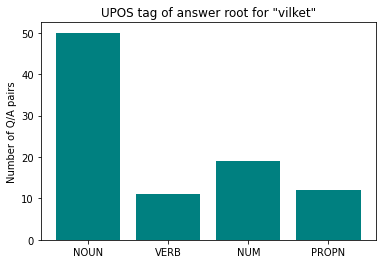

-------------------
pos tag:  NOUN
root words, selection:  ['försäkringskassa', 'stuteri', 'september', 'hälsa', 'september', 'fritidsgård', 'verkstad', 'ojämnhet', 'lokal', 'hem']
-------------------
pos tag:  VERB
root words, selection:  ['studera', 'utveckla', 'få', 'verkställa']
-------------------
pos tag:  NUM
root words, selection:  ['6-9', '32', '40', '2012', '2009', '501', '000', '80', '800']
-------------------
pos tag:  ADJ
root words, selection:  ['lång', 'lång', 'university']
-------------------
pos tag:  ADV
root words, selection:  ['fram']
-------------------
pos tag:  PROPN
root words, selection:  ['jukkasjärvi', 'eskilstuna', 'haag', 'ultuna', 'liberia', 'storbritannien', 'bryssel', 'gunnar', 'flor', 'kyoto']
-------------------
pos tag:  ADP
root words, selection:  ['i']


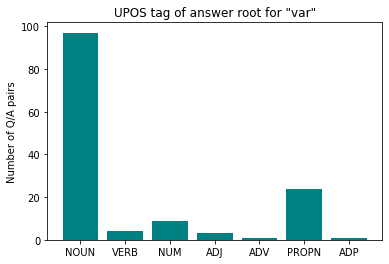

-------------------
pos tag:  NOUN
root words, selection:  ['besparingsskäl', 'struktur']
-------------------
pos tag:  VERB
root words, selection:  ['ändra', 'hänga', 'finnas', 'bedöma', 'rotera', 'slita', 'öka', 'utmärka', 'få', 'se']
-------------------
pos tag:  ADJ
root words, selection:  ['statisk']


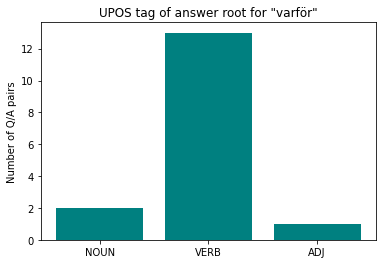

-------------------
pos tag:  NOUN
root words, selection:  ['adress', 'folkbokföringsad', 'landsting', 'adress', 'sida', 'adress', 'valmyndighet']


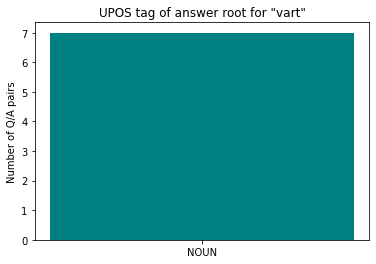

-------------------
pos tag:  NOUN
root words, selection:  ['person', 'officiant', 'köpare']


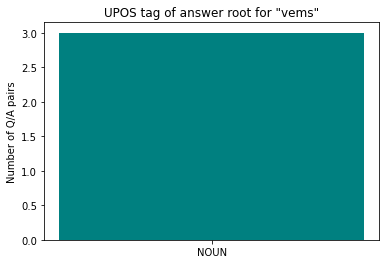

-------------------
pos tag:  PROPN
root words, selection:  ['usa']


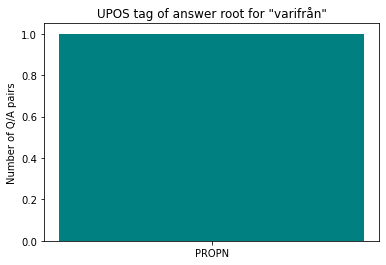

In [54]:
# interrogative word statistics: interrogative word -> word class of root of answer
i_words_map, i_words_map_count, interrogative_word_stats = get_interrogative_word_statistics(df_dp_train, 'answer')
# print the stats for the different interrogative words:
print_interrogative_word_appearance(interrogative_word_stats)

for key, value in i_words_map_count.items():
    print_interrogative_word_statistics(key, value, i_words_map[key])

-------------------
pos tag:  NOUN
root words, selection:  ['tillstånd', 'bevis', 'bevis', 'bevis', 'bevis', 'bevis', 'elinstallatör', 'kopia', 'kopia', 'forum']
-------------------
pos tag:  VERB
root words, selection:  ['ta', 'få', 'innehålla', 'ingå', 'innebära', 'sitta', 'få', 'innebära', 'bli', 'förebygga']
-------------------
pos tag:  PRON
root words, selection:  ['någon', 'man']
-------------------
pos tag:  AUX
root words, selection:  ['vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara', 'vara']
-------------------
pos tag:  ADJ
root words, selection:  ['medgivande', 'viktig', 'datainriktad', 'viktig', 'viktig', 'fokusera', 'ovanlig', 'stor', 'vanlig', 'vanlig']
-------------------
pos tag:  NUM
root words, selection:  ['2']


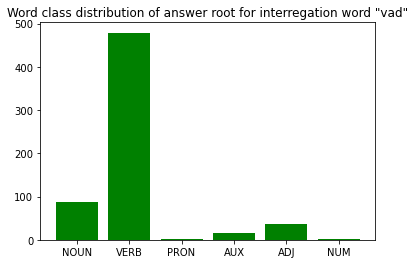

-------------------
pos tag:  VERB
root words, selection:  ['ta', 'ansöka', 'ta', 'dokumentera', 'ta', 'få', 'meddela', 'kontrollera', 'behöva', 'få']
-------------------
pos tag:  NOUN
root words, selection:  ['dag', 'september', 'undantag']
-------------------
pos tag:  ADJ
root words, selection:  ['skyldig', 'vanlig', 'statslös', 'inrikta']


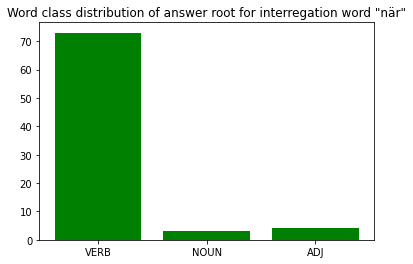

-------------------
pos tag:  VERB
root words, selection:  ['gälla', 'utföra', 'bero', 'gälla', 'ha', 'hålla', 'få', 'kräva', 'ha', 'stå']
-------------------
pos tag:  NOUN
root words, selection:  ['år', 'tillstånd', 'kvitto', 'forskningsuniversitet']
-------------------
pos tag:  ADJ
root words, selection:  ['lång', 'lång', 'lång', 'lång', 'inrikta', 'noggrann', 'stor', 'etablerad', 'viktig']
-------------------
pos tag:  PRON
root words, selection:  ['en']
-------------------
pos tag:  AUX
root words, selection:  ['vara']


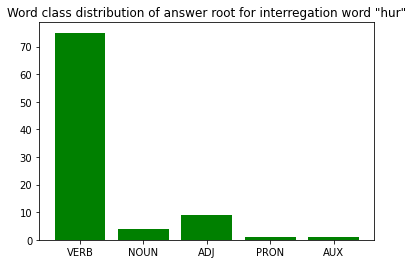

-------------------
pos tag:  NUM
root words, selection:  ['7']
-------------------
pos tag:  VERB
root words, selection:  ['genomföra', 'lämna', 'ske', 'läsa', 'använda', 'skicka', 'betrakta', 'bota', 'vara', 'inrikta']
-------------------
pos tag:  NOUN
root words, selection:  ['svetsmetod', 'exempel', 'arbetsplats', 'arbetsuppgift', 'del', 'gång']
-------------------
pos tag:  ADJ
root words, selection:  ['förankra']


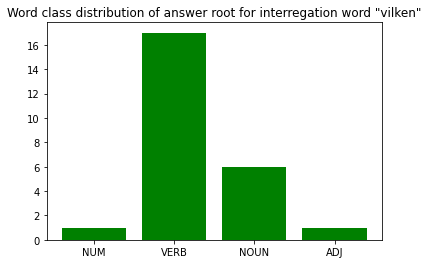

-------------------
pos tag:  VERB
root words, selection:  ['rikta', 'sköta', 'representera', 'ske', 'undanta', 'invalda', 'arbeta', 'samarbeta', 'arbeta', 'beskära']
-------------------
pos tag:  AUX
root words, selection:  ['vara', 'vara']
-------------------
pos tag:  NOUN
root words, selection:  ['arbetsgivare', 'jobb', 'vårdnadshavare', 'arbetsledare', 'företag', 'ärendeslag']
-------------------
pos tag:  ADJ
root words, selection:  ['vanlig', 'vanlig']


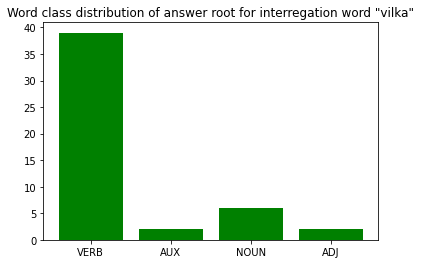

-------------------
pos tag:  NOUN
root words, selection:  ['arbetsgivare', 'fråga', 'arbetsgivare', 'mellanman', 'befälhavare', 'ambulanssjukvårdare', 'ortopedingenjör', 'arbetsledare', 'vårdnadshavare', 'person']
-------------------
pos tag:  VERB
root words, selection:  ['finnas', 'se', 'besiktiga', 'se', 'utföra', 'kontrollera', 'företräda', 'utgå', 'göra', 'kommunicera']


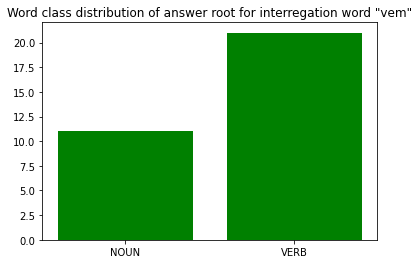

-------------------
pos tag:  VERB
root words, selection:  ['vända', 'fylla', 'förekomma', 'betala', 'förvänta', 'gälla', 'fylla', 'välja', 'fylla', 'gälla']
-------------------
pos tag:  ADJ
root words, selection:  ['gemensam']
-------------------
pos tag:  NOUN
root words, selection:  ['försäkra', 'ansökan', 'ansökan', 'programutbildning', 'turistchef', 'säsongsarbete']


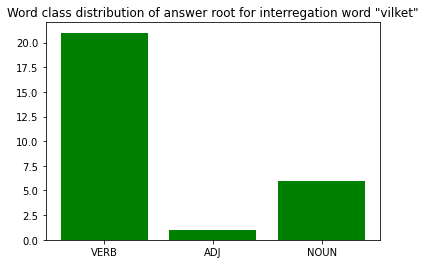

-------------------
pos tag:  VERB
root words, selection:  ['arbeta', 'arbeta', 'granska', 'arbeta', 'stå', 'arbeta', 'arbeta', 'finnas', 'lägga', 'använda']
-------------------
pos tag:  NOUN
root words, selection:  ['dag', 'september', 'anställd', 'säsongsarbete', 'anställd', 'besök', 'initiativ']
-------------------
pos tag:  ADJ
root words, selection:  ['kort', 'fortsätta']
-------------------
pos tag:  AUX
root words, selection:  ['vara', 'vara']


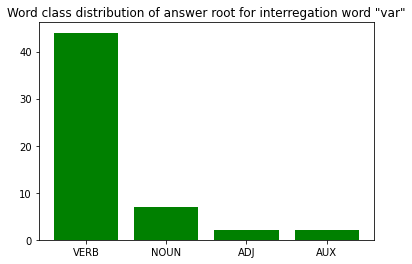

-------------------
pos tag:  VERB
root words, selection:  ['justera', 'klättra', 'arbeta', 'få', 'ha', 'vilja', 'göra', 'förebygga', 'ställa', 'pågå']
-------------------
pos tag:  ADJ
root words, selection:  ['viktig', 'utrusta', 'viktig']
-------------------
pos tag:  NOUN
root words, selection:  ['arbete']


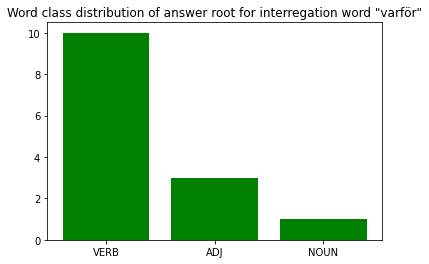

-------------------
pos tag:  VERB
root words, selection:  ['skicka', 'skicka', 'kontakta', 'kontakta', 'kontakta', 'skicka', 'besöka', 'skicka', 'kontakta']


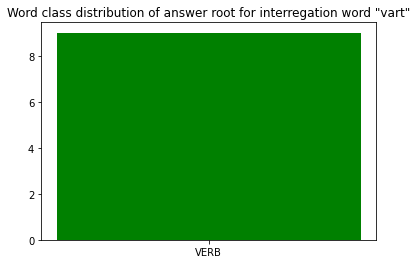

-------------------
pos tag:  NOUN
root words, selection:  ['födelsedatum', 'namnteckning', 'uppgift']


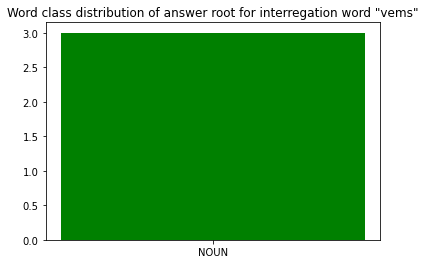

In [10]:
# interrogative word statistics: interrogative word -> word class of root of answer
i_words_map, i_words_map_count, _ = get_interrogative_word_statistics(df_dp_train, 'sent')
for key, value in i_words_map_count.items():
    print_interrogative_word_statistics(key, value, i_words_map[key])